## Machine Learning for POSM position fitting prediction

In [41]:
%matplotlib notebook

In [42]:
import pandas as pd
import numpy as np
from numpy import nan as NaN
import matplotlib.pyplot as plt
import matplotlib as mpl
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [43]:
# slove Chinese display problem
mpl.rcParams["font.sans-serif"] = ["KaiTi"]
mpl.rcParams["font.serif"] = ["KaiTi"]
sns.set_style("darkgrid", {"font.sans-serif": ["KaiTi", "Arial"]})

### Data Cleaning and Preparation

In [44]:
df = pd.read_excel("position_clean_3_samples.xlsx", encoding="utf-8").dropna()
df

,resource position,width,height
0,店内画面,1450.0,2200.0
1,店内画面,1210.0,1800.0
2,灯箱,1140.0,2870.0
3,灯箱,1390.0,2195.0
4,灯箱,1120.0,1920.0
5,灯箱,1120.0,1920.0
6,灯箱,1120.0,1920.0
7,灯箱,1120.0,1920.0
8,Logo,11500.0,11400.0
9,灯箱,1120.0,1920.0


In [45]:
df["resource position"].value_counts()

灯箱      548
店内画面    471
Logo    233
Name: resource position, dtype: int64

In [46]:
# df_sort = df.sort_values(by = "resource position").reset_index().drop(columns = "index")
# df_sort

In [47]:
df_lighbox = df[df["resource position"] == "灯箱"].iloc[-200:,:]
df_lighbox

,resource position,width,height
1098,灯箱,2185.0,1435.0
1099,灯箱,2185.0,1435.0
1100,灯箱,1100.0,1300.0
1101,灯箱,1100.0,1300.0
1102,灯箱,1100.0,1300.0
1103,灯箱,1100.0,1300.0
1109,灯箱,2850.0,1860.0
1110,灯箱,2850.0,1860.0
1111,灯箱,2850.0,1860.0
1116,灯箱,795.0,795.0


In [48]:
df_logo = df[df["resource position"] == "Logo"].iloc[-200:,:]
df_logo

,resource position,width,height
238,Logo,900.0,900.0
246,Logo,600.0,600.0
247,Logo,900.0,900.0
268,Logo,900.0,900.0
269,Logo,1200.0,1200.0
271,Logo,600.0,600.0
274,Logo,1200.0,1200.0
280,Logo,900.0,900.0
296,Logo,875.0,870.0
297,Logo,590.0,590.0


In [49]:
df_instore_image = df[df["resource position"] == "店内画面"].iloc[-200:,:]
df_instore_image

,resource position,width,height
1112,店内画面,2730.0,1500.0
1113,店内画面,1280.0,2280.0
1114,店内画面,1320.0,2280.0
1115,店内画面,600.0,800.0
1123,店内画面,1515.0,1250.0
1124,店内画面,2870.0,1250.0
1125,店内画面,1150.0,2140.0
1141,店内画面,1095.0,2400.0
1142,店内画面,1100.0,2400.0
1143,店内画面,1100.0,2400.0


In [50]:
# merge three new df
df_ml = pd.concat([df_lighbox,df_logo,df_instore_image]).reset_index().drop(columns="index")
df_ml

,resource position,width,height
0,灯箱,2185.0,1435.0
1,灯箱,2185.0,1435.0
2,灯箱,1100.0,1300.0
3,灯箱,1100.0,1300.0
4,灯箱,1100.0,1300.0
5,灯箱,1100.0,1300.0
6,灯箱,2850.0,1860.0
7,灯箱,2850.0,1860.0
8,灯箱,2850.0,1860.0
9,灯箱,795.0,795.0


In [51]:
# check column data type
print(df["width"].dtype)
print(df["height"].dtype)

float64
float64


<IPython.core.display.Javascript object>


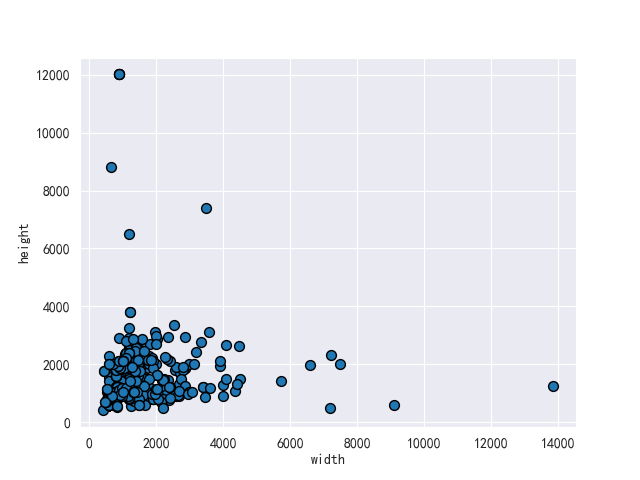

Text(0, 0.5, 'height')

In [52]:
# plot the whole scatter and see where most points locate
plt.scatter(df_ml["width"], df_ml["height"], s=50, edgecolors="k")
plt.xlabel("width")
plt.ylabel("height")

In [53]:
df_ml.groupby(["resource position"]).describe()

width                                                       \
                   count     mean          std    min    25%     50%      75%   
resource position                                                               
Logo               200.0   734.77   259.357318  590.0  600.0   600.0   900.00   
店内画面               200.0  1490.67  1065.892987  455.0  875.0  1150.0  1837.50   
灯箱                 200.0  1546.86  1402.822557  400.0  843.0  1100.0  1729.75   

                           height                                        \
                       max  count      mean          std    min     25%   
resource position                                                         
Logo                2640.0  200.0   726.775   224.204287  590.0   600.0   
店内画面                9100.0  200.0  1850.040  1758.918369  480.0  1050.0   
灯箱                 13860.0  200.0  1485.955   556.102141  400.0  1181.5   

                                            
                      50%     75%      max  
resource position                           
Logo                600.0   900.0   2280.0  
店内画面               1470.0  2100.0  12013.0  
灯箱                 1390.0  1860.0   3365.0

In [54]:
df = df_ml.set_index("resource position")
df

,width,height
resource position,,
灯箱,2185.0,1435.0
灯箱,2185.0,1435.0
灯箱,1100.0,1300.0
灯箱,1100.0,1300.0
灯箱,1100.0,1300.0
灯箱,1100.0,1300.0
灯箱,2850.0,1860.0
灯箱,2850.0,1860.0
灯箱,2850.0,1860.0


In [55]:
df_lightbox = df.loc["灯箱", :]
df_logo = df.loc["Logo",:]
df_instore = df.loc["店内画面",:]

In [56]:
df_logo["width"].shape

(200,)

<IPython.core.display.Javascript object>


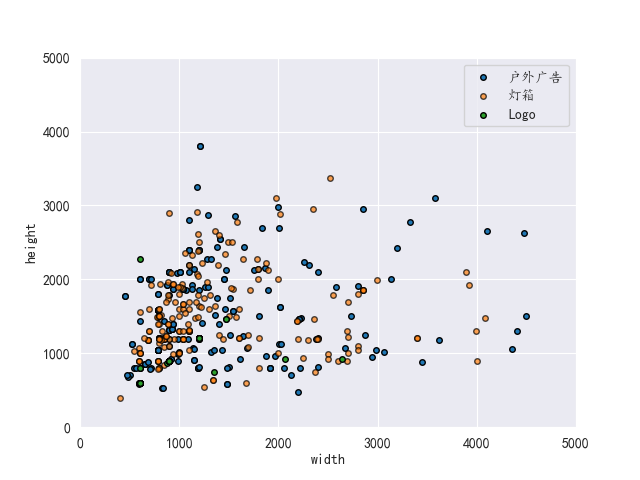

In [57]:
plt.figure()

plt.scatter(df_instore["width"], df_instore["height"], edgecolors="k", s = 16, label= "户外广告",)
plt.scatter(df_lightbox["width"], df_lightbox["height"], edgecolors="k", label="灯箱", alpha=0.7, s = 16)
plt.scatter(df_logo["width"], df_logo["height"],edgecolors="k", s = 16, label="Logo")

plt.xlabel("width")
plt.ylabel("height")
plt.ylim(0,5000)
plt.xlim(0,5000)
plt.legend() 

In [58]:
# Dataset Preparation
df_ml = df.reset_index()
df_ml

,resource position,width,height
0,灯箱,2185.0,1435.0
1,灯箱,2185.0,1435.0
2,灯箱,1100.0,1300.0
3,灯箱,1100.0,1300.0
4,灯箱,1100.0,1300.0
5,灯箱,1100.0,1300.0
6,灯箱,2850.0,1860.0
7,灯箱,2850.0,1860.0
8,灯箱,2850.0,1860.0
9,灯箱,795.0,795.0


In [81]:
# Split into training and test group
X = df_ml[["width", "height"]]
y = df_ml["resource position"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### 1. KNNclassifier

In [60]:
# KNNclassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) # default n_neighbors = 5
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [62]:
knn.score(X_test, y_test)

0.7533333333333333

<IPython.core.display.Javascript object>


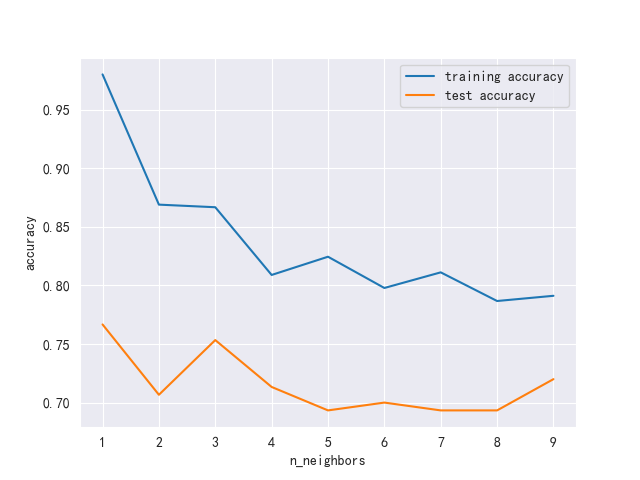

In [63]:
plt.figure()
# try n_neighbors from 1 to 10
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,10)

for n_neighbors in neighbors_settings:
    # build model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
# Plot and see trend
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()

In [64]:
# show the prediction for new measurement
knn.predict([[1120,1920]])

array(['店内画面'], dtype=object)

### 2. SVMs

In [65]:
from sklearn.svm import SVC
svm = SVC(C=1000, gamma=0.001)
svm

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
svm.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
svm.score(X_train, y_train)

0.9822222222222222

In [68]:
svm.score(X_test, y_test)

0.78

### 3. Decision Trees

In [69]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [70]:
# Split into training and test group
X = df_ml[["width", "height"]]
y = df_ml["resource position"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,random_state = 42)

In [71]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [72]:
tree.score(X_train, y_train)

0.9822222222222222

In [73]:
tree.score(X_test, y_test)

0.8

<IPython.core.display.Javascript object>


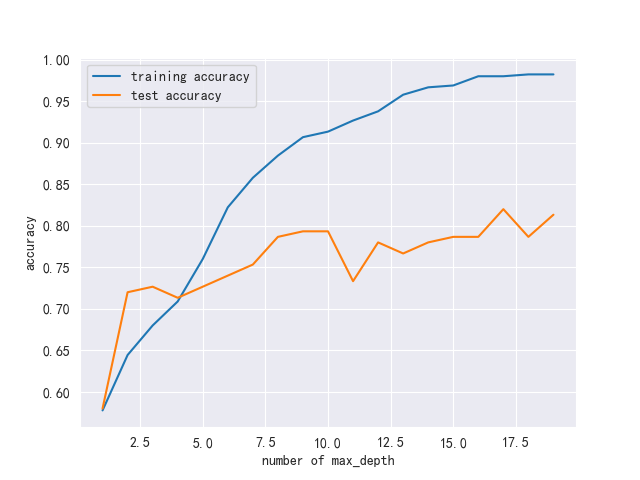

In [74]:
# Plot the accuracy trend
plt.figure()

tree_training_score = []
tree_test_score = []

tree_settings = range(1,20)

for max_depth in tree_settings:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    
    tree_training_score.append(tree.score(X_train, y_train))
    
    tree_test_score.append(tree.score(X_test, y_test))
    
plt.plot(tree_settings, tree_training_score, label = "training accuracy")
plt.plot(tree_settings, tree_test_score, label= "test accuracy")
plt.xlabel("number of max_depth")
plt.ylabel("accuracy")
plt.legend()

### 4. Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2)

In [77]:
forest = RandomForestClassifier(n_estimators=12, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [78]:
forest.score(X_train, y_train)

0.9777777777777777

In [79]:
forest.score(X_test, y_test)

0.78

<IPython.core.display.Javascript object>


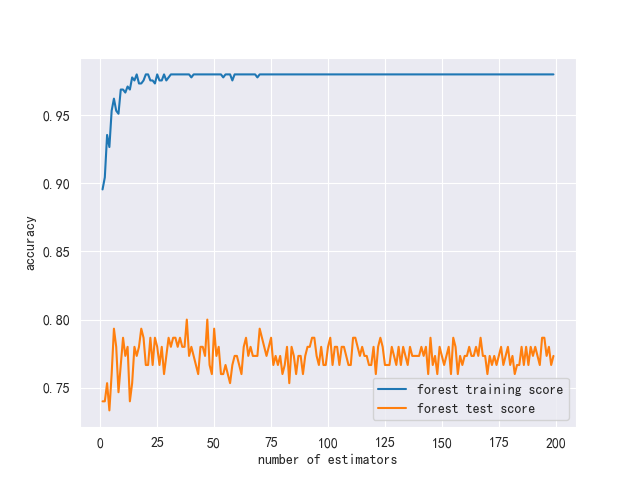

In [80]:
plt.figure()

forest_training_score = []
forest_test_score = []

forest_settings = range(1,200)

for n_estimators in forest_settings:
    forest = RandomForestClassifier(n_estimators=n_estimators)
    forest.fit(X_train, y_train)
    
    forest_training_score.append(forest.score(X_train, y_train))
    forest_test_score.append(forest.score(X_test, y_test))

plt.plot(forest_settings, forest_training_score, label = "forest training score")
plt.plot(forest_settings, forest_test_score, label = "forest test score")
plt.xlabel("number of estimators")
plt.ylabel("accuracy")
plt.legend()

### 5. Gradient Boosting Machines

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [121]:
gbrt = GradientBoostingClassifier(learning_rate=0.1, random_state = 0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [122]:
gbrt.score(X_train, y_train)

0.9466666666666667

In [123]:
gbrt.score(X_test, y_test)

0.7866666666666666